# ModernGL
- https://github.com/cprogrammer1994/Headless-rendering-with-python
- https://github.com/moderngl/moderngl/blob/501fa6421ff8d5b1c7485a87992764f53c897b63/examples/old-examples/standalone/README.md
- https://github.com/moderngl/moderngl/blob/master/examples/headless_egl.py

In [1]:
import os
import sys
import json
import glob
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from pyrr import Matrix44
import moderngl
import modules.ObjectLoader

# ModernGL

## Simple Example

In [8]:
vertex_shader_source = open('shaders/shader_headless.vert').read()
fragment_shader_source = open('shaders/shader_headless.frag').read()

In [11]:
ctx = moderngl.create_context(standalone=True)
fbo = ctx.simple_framebuffer((512, 512), components=4)
fbo.use()

In [12]:
vertices = np.array([
    -1.0,  -1.0,   1.0, 0.0, 0.0,
     1.0,  -1.0,   0.0, 1.0, 0.0,
     0.0,   1.0,   0.0, 0.0, 1.0],
    dtype='f4',
)

prog = ctx.program(vertex_shader=vertex_shader_source, fragment_shader=fragment_shader_source,)
vao = ctx.simple_vertex_array(prog, ctx.buffer(vertices), 'in_vert', 'in_color')
vao.render(mode=moderngl.TRIANGLES)

image = Image.frombytes('RGB', (512, 512), fbo.read(components=3))
image = image.transpose(Image.FLIP_TOP_BOTTOM)
image.save('triangle.png', format='png')

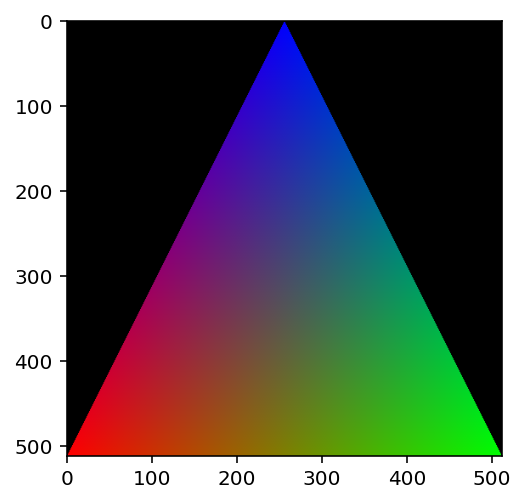

In [13]:
triangle_image = np.array(image)
plt.imshow(triangle_image)

# Sitting Example

In [14]:
vertex_shader_source = open('shaders/shader_example.vert').read()
fragment_shader_source = open('shaders/shader_example.frag').read()

In [15]:
vertex_data = modules.ObjectLoader.Obj.open('data/sitting.obj')
vertex_data = vertex_data.pack('vx vy vz nx ny nz tx ty tz')

In [16]:
# Data files
texture_image = Image.open('data/wood.jpg')

In [24]:
def read_from_fbo(fbo):
    """ Retrieves np Image from FBO """
    pixels = fbo.read(components=3, alignment=1)
    img = np.array(Image.frombytes('RGB', fbo.size, pixels).transpose(Image.FLIP_TOP_BOTTOM))
    return img

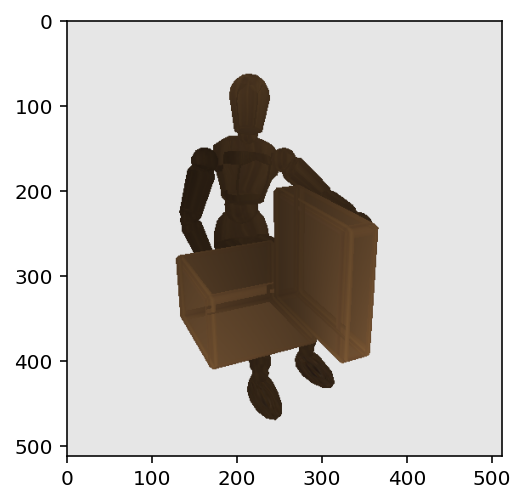

In [23]:
# Context creation

ctx = moderngl.create_context(standalone=True)

# Shaders
prog = ctx.program(vertex_shader=vertex_shader_source, fragment_shader=fragment_shader_source,)

# Matrices and Uniforms

perspective = Matrix44.perspective_projection(45.0, 1.0, 0.1, 1000.0)
lookat = Matrix44.look_at(
    (-85, -180, 140),
    (0.0, 0.0, 65.0),
    (0.0, 0.0, 1.0),
)

mvp = perspective * lookat

prog['Light'].value = (-140.0, -300.0, 350.0)
prog['Color'].value = (1.0, 1.0, 1.0, 0.25)
prog['Mvp'].write(mvp.astype('float32').tobytes())

# Texture

texture = ctx.texture(texture_image.size, 3, texture_image.tobytes())
texture.build_mipmaps()

# Vertex Buffer and Vertex Array

vbo = ctx.buffer(vertex_data)
vao = ctx.simple_vertex_array(prog, vbo, 'in_vert', 'in_text', 'in_norm')

# Framebuffers
viewport_width = 512
viewport_height = 512
fbo = self.context.framebuffer(
    ctx.renderbuffer((viewport_width, viewport_height)),
    ctx.depth_renderbuffer((viewport_width, viewport_height), )
)
# fbo1 = ctx.framebuffer(ctx.renderbuffer((512, 512), samples=0))
# fbo2 = ctx.framebuffer(ctx.renderbuffer((512, 512)))

# Rendering

fbo.use()
ctx.enable(moderngl.DEPTH_TEST)
ctx.clear(0.9, 0.9, 0.9)
texture.use()
vao.render()

# Downsampling and loading the image using Pillow

ctx.copy_framebuffer(fbo2, fbo1)
data = fbo2.read(components=3, alignment=1)
img = Image.frombytes('RGB', fbo2.size, data).transpose(Image.FLIP_TOP_BOTTOM)
img = np.array(img)
plt.imshow(img)

In [36]:
ctx = moderngl.create_context(standalone=True)
prog = ctx.program(vertex_shader=vertex_shader_source, fragment_shader=fragment_shader_source,)

In [37]:
# Matrices and Uniforms
perspective = Matrix44.perspective_projection(45.0, 1.0, 0.1, 1000.0)
lookat = Matrix44.look_at(
    (-85, -180, 140),
    (0.0, 0.0, 65.0),
    (0.0, 0.0, 1.0),
)

mvp = perspective * lookat

# https://github.com/moderngl/moderngl/issues/154
prog['Light'].value = (-140.0, -300.0, 350.0)
prog['Color'].value = (1.0, 1.0, 1.0, 0.25)
prog['Mvp'].write(mvp.astype('float32').tobytes())

In [38]:
# Texture
texture = ctx.texture(texture_image.size, 3, texture_image.tobytes())
texture.build_mipmaps()

In [39]:
vao = ctx.simple_vertex_array(prog, ctx.buffer(vertex_data), 'in_vert', 'in_text', 'in_norm')
vao.render(mode=moderngl.TRIANGLES)

In [41]:
# vbo = ctx.buffer(vertex_data)
# vao = ctx.simple_vertex_array(prog, vbo, ['in_vert', 'in_text', 'in_norm'])

# Framebuffers
fbo1 = ctx.framebuffer(ctx.renderbuffer((512, 512), samples=0))
fbo2 = ctx.framebuffer(ctx.renderbuffer((512, 512)))

# Rendering
fbo1.use()
ctx.enable(moderngl.DEPTH_TEST)
ctx.clear(0.9, 0.9, 0.9)
texture.use()
vao.render()

# Downsampling and loading the image using Pillow
ctx.copy_framebuffer(fbo2, fbo1)
data = fbo2.read(components=3, alignment=1)
img = Image.frombytes('RGB', fbo2.size, data).transpose(Image.FLIP_TOP_BOTTOM)
img.show()

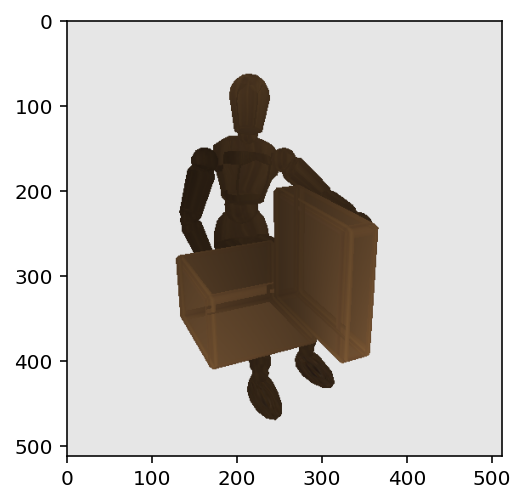

In [42]:
plt.imshow(np.array(img))